In [1]:
#All required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [2]:
# Load dataset and drop missing rows
taxis = pd.read_csv('yellow_tripdata_2018-01.csv').dropna(how='all')

In [3]:
# Size of data
len(taxis)

8759874

In [4]:
# random sample of size use all data and checking first 5 rows of data set
df = taxis.sample(n=8759874)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
6905444,1,2018-01-25 20:31:02,2018-01-25 20:35:07,1,0.50,1,N,140,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95
7308045,1,2018-01-27 00:34:07,2018-01-27 00:46:13,0,2.30,1,N,142,263,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30
4770826,1,2018-01-18 17:12:03,2018-01-18 17:18:08,1,0.90,1,N,65,66,2,6.5,1.0,0.5,0.00,0.0,0.3,8.30
7176290,2,2018-01-26 17:50:28,2018-01-26 18:24:44,1,7.10,1,N,161,33,1,26.5,1.0,0.5,4.00,0.0,0.3,32.30
456269,2,2018-01-02 21:01:30,2018-01-02 21:16:36,1,2.58,1,N,237,48,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30


In [5]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8759874 entries, 6905444 to 8554392
Data columns (total 17 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.2+ GB


In [6]:
# Converting pickup_datetime from string format to pandas datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'],format = '%Y-%m-%d %H:%M:%S')

In [7]:
#converting pickup datetime from string format to pandas datetime format
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'],format = '%Y-%m-%d %H:%M:%S')

In [8]:
# use locations and zones to prepration the data for task1.1 complete
locations = pd.read_csv('https://s3.amazonaws.com/nyc-tlc/misc/taxi+_zone_lookup.csv')

In [9]:
# Converting pickup_datetime and dropoff_datetime objects to datetime format
dfdt = pd.to_datetime(df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].stack(), format='%Y-%m-%d %H:%M:%S').unstack()

In [10]:
# Computing duration of each trip and adding new column
df['duration'] = dfdt['tpep_dropoff_datetime'] - dfdt['tpep_pickup_datetime']
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
6905444,1,2018-01-25 20:31:02,2018-01-25 20:35:07,1,0.50,1,N,140,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,00:04:05
7308045,1,2018-01-27 00:34:07,2018-01-27 00:46:13,0,2.30,1,N,142,263,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30,00:12:06
4770826,1,2018-01-18 17:12:03,2018-01-18 17:18:08,1,0.90,1,N,65,66,2,6.5,1.0,0.5,0.00,0.0,0.3,8.30,00:06:05
7176290,2,2018-01-26 17:50:28,2018-01-26 18:24:44,1,7.10,1,N,161,33,1,26.5,1.0,0.5,4.00,0.0,0.3,32.30,00:34:16
456269,2,2018-01-02 21:01:30,2018-01-02 21:16:36,1,2.58,1,N,237,48,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30,00:15:06


In [11]:
# compute average speed of each trip:
df['speed'] = df['trip_distance']/(df['duration'].dt.total_seconds())
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,speed
6905444,1,2018-01-25 20:31:02,2018-01-25 20:35:07,1,0.50,1,N,140,162,1,4.5,0.5,0.5,1.15,0.0,0.3,6.95,00:04:05,0.002041
7308045,1,2018-01-27 00:34:07,2018-01-27 00:46:13,0,2.30,1,N,142,263,2,11.0,0.5,0.5,0.00,0.0,0.3,12.30,00:12:06,0.003168
4770826,1,2018-01-18 17:12:03,2018-01-18 17:18:08,1,0.90,1,N,65,66,2,6.5,1.0,0.5,0.00,0.0,0.3,8.30,00:06:05,0.002466
7176290,2,2018-01-26 17:50:28,2018-01-26 18:24:44,1,7.10,1,N,161,33,1,26.5,1.0,0.5,4.00,0.0,0.3,32.30,00:34:16,0.003453
456269,2,2018-01-02 21:01:30,2018-01-02 21:16:36,1,2.58,1,N,237,48,2,12.0,0.5,0.5,0.00,0.0,0.3,13.30,00:15:06,0.002848


In [12]:
# converting mile/sec to kms/hr
df['speed'] = (df['speed'] * 3600) * 1.609344

In [13]:
#data selection and converting duration to seconds
data = df[['fare_amount','speed','trip_distance','duration','total_amount','extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']]
data.duration = data['duration'].dt.total_seconds()
data['PULocationID'] = df.PULocationID
data['DOLocationID'] = df.DOLocationID
data.head()

/home/arpana/.virtualenvs/analyticlabs-3/lib/python3.5/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/arpana/.virtualenvs/analyticlabs-3/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/arpana/.virtualenvs/analyticlabs-3/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,PULocationID,DOLocationID
6905444,4.5,11.823752,0.50,245.0,6.95,0.5,0.5,1.15,0.0,0.3,140,162
7308045,11.0,18.354502,2.30,726.0,12.30,0.5,0.5,0.00,0.0,0.3,142,263
4770826,6.5,14.285684,0.90,365.0,8.30,1.0,0.5,0.00,0.0,0.3,65,66
7176290,26.5,20.007214,7.10,2056.0,32.30,1.0,0.5,4.00,0.0,0.3,161,33
456269,12.0,16.498440,2.58,906.0,13.30,0.5,0.5,0.00,0.0,0.3,237,48


In [14]:
data = data.groupby(['DOLocationID','PULocationID']).mean()
data = data.reset_index()
data.head()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
0,1,1,75.622168,861.971024,1.567645,284.265421,89.617383,0.047664,0.16729,10.542972,2.944579,0.29271
1,1,4,62.900000,49.172246,15.826000,1889.800000,90.636000,0.000000,0.00000,14.446000,12.600000,0.30000
2,1,7,90.500000,65.509465,27.660000,2526.500000,112.680000,0.000000,0.00000,0.000000,21.880000,0.30000
3,1,10,110.000000,71.572720,35.750000,2881.000000,156.575000,0.250000,0.00000,26.095000,19.930000,0.30000
4,1,12,73.625000,42.373314,18.682500,2961.000000,92.140000,0.250000,0.00000,3.965000,14.000000,0.30000


In [15]:
# remove rows with invalid speed
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

In [16]:
# Selecting data where pickup and dropoff location is different and removing duplicates
data = data[data.DOLocationID != data.PULocationID]
data = data.drop_duplicates(['DOLocationID','PULocationID'])
data.head()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge
1,1,4,62.900000,49.172246,15.826000,1889.800000,90.636,0.00,0.0,14.446000,12.600000,0.3
2,1,7,90.500000,65.509465,27.660000,2526.500000,112.680,0.00,0.0,0.000000,21.880000,0.3
3,1,10,110.000000,71.572720,35.750000,2881.000000,156.575,0.25,0.0,26.095000,19.930000,0.3
4,1,12,73.625000,42.373314,18.682500,2961.000000,92.140,0.25,0.0,3.965000,14.000000,0.3
6,1,14,128.666667,71.014176,25.406667,2056.333333,188.260,0.00,0.0,27.406667,31.886667,0.3


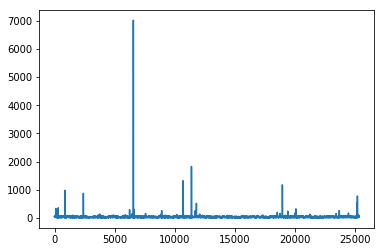

In [17]:
# Plotting speed
data['speed'].plot()

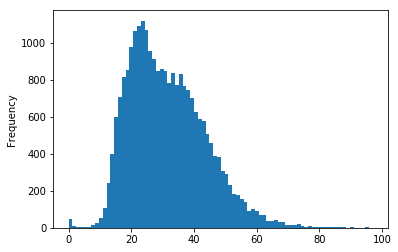

In [18]:
# Plotting speed where speed is less than 100
data['speed'][data['speed']<=100].plot.hist(bins=80)

In [19]:
#calculating mean value for  speed given speed is less than 100
data['speed'][data['speed']<=100].mean()

31.513824123265774

In [20]:
# Applying one-sample t-test using scipy library with considering mean value range from 25 to 40.
#based on One sample t-test.

from scipy.stats import ttest_1samp
import numpy as np

accepted_speed=[]
for i in range(25,40):
    tset, pval = ttest_1samp(data['speed'], i)
    print('p-values',pval)
    if pval < 0.05:    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    else:
        print("we are accepting null hypothesis")
        accepted_speed.append(i)
accepted_speed

p-values 1.0296710400049755e-115
 we are rejecting null hypothesis
p-values 7.621837392162684e-87
 we are rejecting null hypothesis
p-values 4.3476833409076265e-62
 we are rejecting null hypothesis
p-values 1.6918708500398605e-41
 we are rejecting null hypothesis
p-values 4.0947442471836946e-25
 we are rejecting null hypothesis
p-values 5.855974885358776e-13
 we are rejecting null hypothesis
p-values 5.095743403644793e-05
 we are rejecting null hypothesis
p-values 0.37016808737864915
we are accepting null hypothesis
p-values 0.023857717749284694
 we are rejecting null hypothesis
p-values 6.176054934120761e-08
 we are rejecting null hypothesis
p-values 1.084546717157159e-17
 we are rejecting null hypothesis
p-values 1.126858819254066e-31
 we are rejecting null hypothesis
p-values 7.027695672834141e-50
 we are rejecting null hypothesis
p-values 2.825353819121741e-72
 we are rejecting null hypothesis
p-values 8.141539958124556e-99
 we are rejecting null hypothesis


[32]

In [21]:
# Making target value, 1 if speed is more than 32 else 0.
data['target'] = data.speed.apply(lambda x: 1 if x>32 else 0)
data.head()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
1,1,4,62.900000,49.172246,15.826000,1889.800000,90.636,0.00,0.0,14.446000,12.600000,0.3,1
2,1,7,90.500000,65.509465,27.660000,2526.500000,112.680,0.00,0.0,0.000000,21.880000,0.3,1
3,1,10,110.000000,71.572720,35.750000,2881.000000,156.575,0.25,0.0,26.095000,19.930000,0.3,1
4,1,12,73.625000,42.373314,18.682500,2961.000000,92.140,0.25,0.0,3.965000,14.000000,0.3,1
6,1,14,128.666667,71.014176,25.406667,2056.333333,188.260,0.00,0.0,27.406667,31.886667,0.3,1


In [22]:
#saving data to csv file
data.to_csv('averaged_data.csv',index = False)
data.describe()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
count,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000
mean,135.790210,142.337047,29.413837,32.283984,8.813329,1901.735404,34.812189,0.363043,0.493486,2.921667,1.298803,0.299644,0.440856
std,76.620049,75.947454,16.537007,49.966328,5.664794,3087.516378,20.179123,0.341583,0.047145,3.518043,3.231613,0.006575,0.496500
min,1.000000,1.000000,0.000000,0.000000,0.000000,-607.909465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,79.000000,17.238068,22.174323,4.398989,1119.000000,20.300000,0.200000,0.500000,0.540152,0.000000,0.300000,0.000000
50%,137.000000,143.000000,26.812500,29.893698,7.865000,1586.649254,31.300000,0.366667,0.500000,2.084402,0.000000,0.300000,0.000000
75%,202.000000,216.000000,39.000000,39.348012,12.331667,2130.944444,45.176700,0.500000,0.500000,3.984500,0.960000,0.300000,1.000000
max,265.000000,265.000000,286.500000,7012.619919,77.956667,86344.000000,363.380000,12.500000,0.500000,116.230000,194.748000,0.300000,1.000000


# Data Visualization(EDA)

In [23]:
import pandas as pd
import numpy as np
#from fancyimpute import KNN 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [24]:
df = pd.read_csv('averaged_data.csv')
df.head()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
0,1,4,62.900000,49.172246,15.826000,1889.800000,90.636,0.00,0.0,14.446000,12.600000,0.3,1
1,1,7,90.500000,65.509465,27.660000,2526.500000,112.680,0.00,0.0,0.000000,21.880000,0.3,1
2,1,10,110.000000,71.572720,35.750000,2881.000000,156.575,0.25,0.0,26.095000,19.930000,0.3,1
3,1,12,73.625000,42.373314,18.682500,2961.000000,92.140,0.25,0.0,3.965000,14.000000,0.3,1
4,1,14,128.666667,71.014176,25.406667,2056.333333,188.260,0.00,0.0,27.406667,31.886667,0.3,1


In [25]:
df.describe()

,DOLocationID,PULocationID,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
count,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000
mean,135.790210,142.337047,29.413837,32.283984,8.813329,1901.735404,34.812189,0.363043,0.493486,2.921667,1.298803,0.299644,0.440856
std,76.620049,75.947454,16.537007,49.966328,5.664794,3087.516378,20.179123,0.341583,0.047145,3.518043,3.231613,0.006575,0.496500
min,1.000000,1.000000,0.000000,0.000000,0.000000,-607.909465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,79.000000,17.238068,22.174323,4.398989,1119.000000,20.300000,0.200000,0.500000,0.540152,0.000000,0.300000,0.000000
50%,137.000000,143.000000,26.812500,29.893698,7.865000,1586.649254,31.300000,0.366667,0.500000,2.084402,0.000000,0.300000,0.000000
75%,202.000000,216.000000,39.000000,39.348012,12.331667,2130.944444,45.176700,0.500000,0.500000,3.984500,0.960000,0.300000,1.000000
max,265.000000,265.000000,286.500000,7012.619919,77.956667,86344.000000,363.380000,12.500000,0.500000,116.230000,194.748000,0.300000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24863 entries, 0 to 24862
Data columns (total 13 columns):
DOLocationID             24863 non-null int64
PULocationID             24863 non-null int64
fare_amount              24863 non-null float64
speed                    24863 non-null float64
trip_distance            24863 non-null float64
duration                 24863 non-null float64
total_amount             24863 non-null float64
extra                    24863 non-null float64
mta_tax                  24863 non-null float64
tip_amount               24863 non-null float64
tolls_amount             24863 non-null float64
improvement_surcharge    24863 non-null float64
target                   24863 non-null int64
dtypes: float64(10), int64(3)
memory usage: 2.5 MB


Here we can see that there is no missing values. So, any imputation not required at this point.

In [27]:
data = df.drop(['DOLocationID','PULocationID'],axis=1)
data.duration = data.duration/60
data.head()

,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
0,62.900000,49.172246,15.826000,31.496667,90.636,0.00,0.0,14.446000,12.600000,0.3,1
1,90.500000,65.509465,27.660000,42.108333,112.680,0.00,0.0,0.000000,21.880000,0.3,1
2,110.000000,71.572720,35.750000,48.016667,156.575,0.25,0.0,26.095000,19.930000,0.3,1
3,73.625000,42.373314,18.682500,49.350000,92.140,0.25,0.0,3.965000,14.000000,0.3,1
4,128.666667,71.014176,25.406667,34.272222,188.260,0.00,0.0,27.406667,31.886667,0.3,1


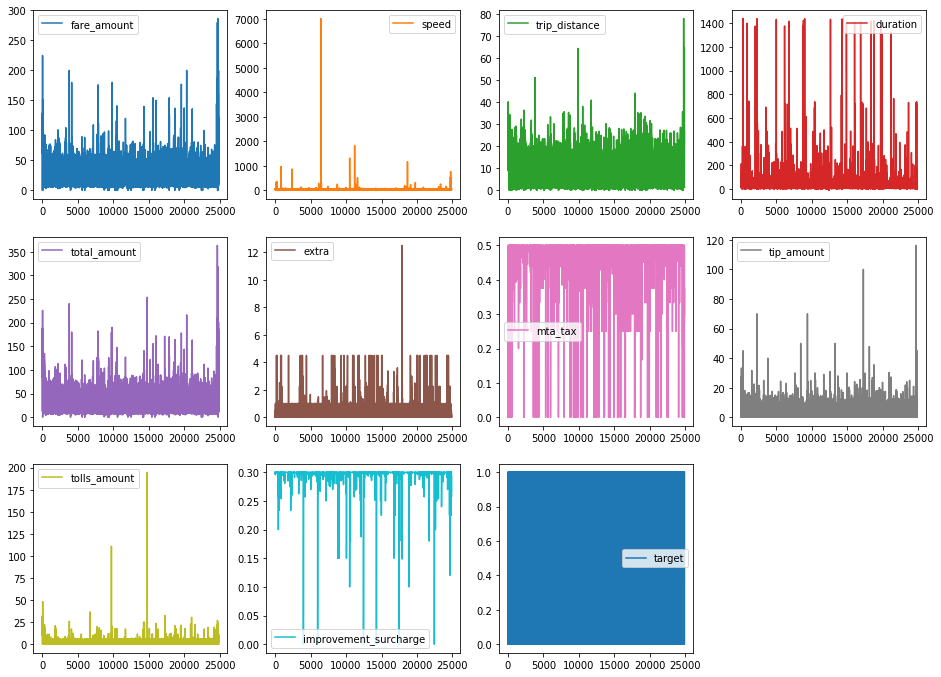

In [28]:
#line plot of all features and target
data.plot(kind='line',subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

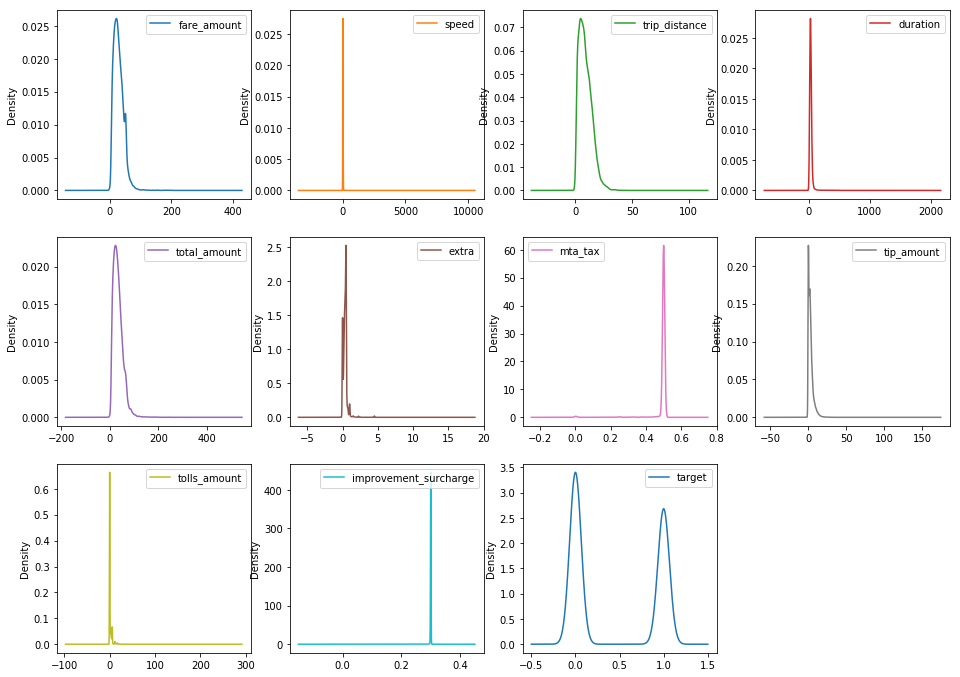

In [29]:
#Density plot of all features and target
#Density plots and histograms show the spread of data
data.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

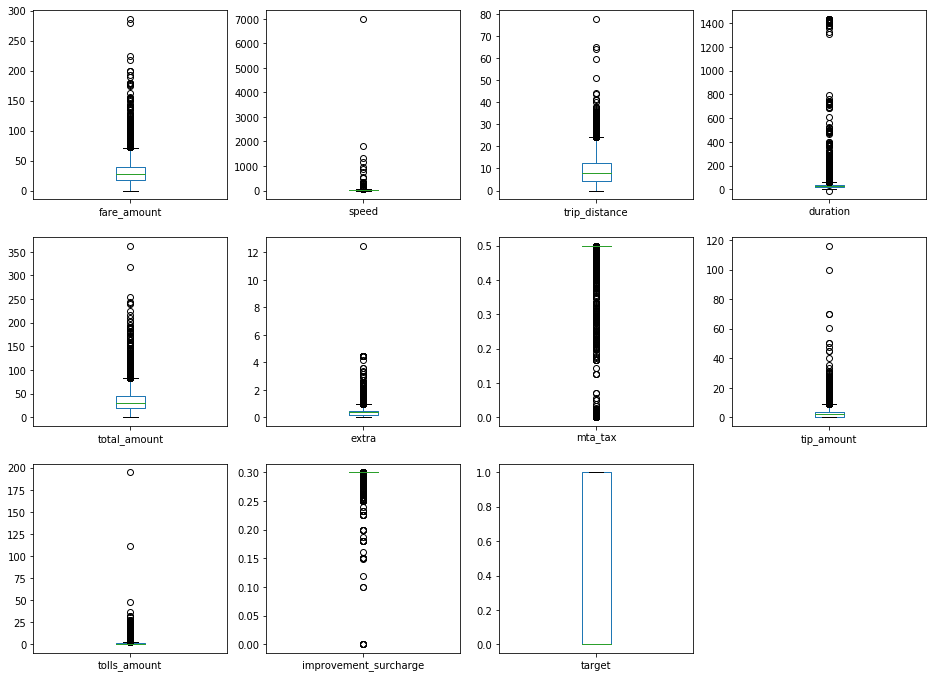

In [30]:
#box plot of all features and target
#Box plots can identify outliers
data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(16,16))
plt.show()

From above plots we can see that in some cases speed is in 1000's which is impossible for any road vehicle to reach this speed value and hence we can say that there are many wrong values in data.

Here, 1st we will replace values with None where speed is more than 150 as it's vary extreame case for any road vehicle.

In [31]:
#removing value if speed is more than 150
data.speed = data.speed.apply(lambda x: np.nan if x > 150 else x)

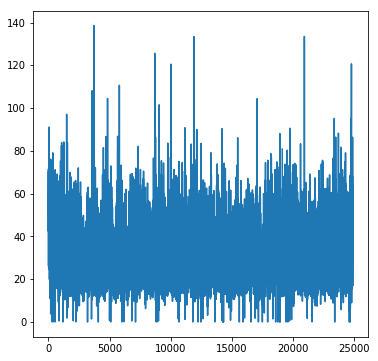

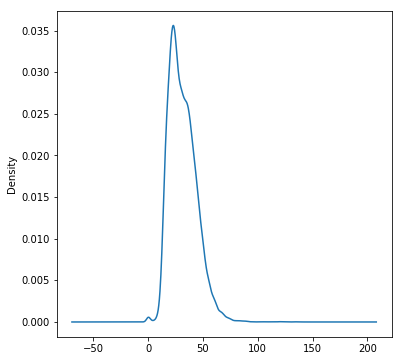

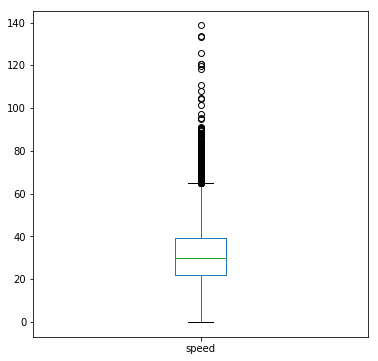

In [32]:
#plotting speed after removing values > 150 
data.speed.plot(kind='line',sharex=False,figsize=(6,6))
plt.show()
data.speed.plot(kind='density', sharex=False,figsize=(6,6))
plt.show()
data.speed.plot(kind='box',sharex=False, sharey=False,figsize=(6,6))
plt.show()

As we can there are many outliers in data. So, first we will replace these values with nan

In [33]:
#removing extreme value from data
def find_anomalies(x,std,mean):
    # Set upper and lower limit to 3 standard deviation
    anomaly_cut_off = std * 3
    lower_limit  = mean - anomaly_cut_off 
    upper_limit = mean + anomaly_cut_off
    if x > upper_limit or x < lower_limit:
        return np.nan
    return x

std_all = data.std()
mean_all = data.mean()
data_no_outlier = pd.DataFrame()
for col in data.columns:
    data_no_outlier[col] = data[col].apply(lambda x:find_anomalies(x,std_all[col],mean_all[col]))
data_no_outlier.head()

,fare_amount,speed,trip_distance,duration,total_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,target
0,62.900,49.172246,15.826000,31.496667,90.636,0.00,NaN,NaN,NaN,0.3,1
1,NaN,65.509465,NaN,42.108333,NaN,0.00,NaN,0.000,NaN,0.3,1
2,NaN,NaN,NaN,48.016667,NaN,0.25,NaN,NaN,NaN,0.3,1
3,73.625,42.373314,18.682500,49.350000,92.140,0.25,NaN,3.965,NaN,0.3,1
4,NaN,NaN,25.406667,34.272222,NaN,0.00,NaN,NaN,NaN,0.3,1


In [34]:
#number of missing value after removing extreme values 
data_no_outlier.isna().sum()

fare_amount              206
speed                    201
trip_distance            218
duration                 154
total_amount             259
extra                    247
mta_tax                  379
tip_amount               372
tolls_amount             677
improvement_surcharge     82
target                     0
dtype: int64

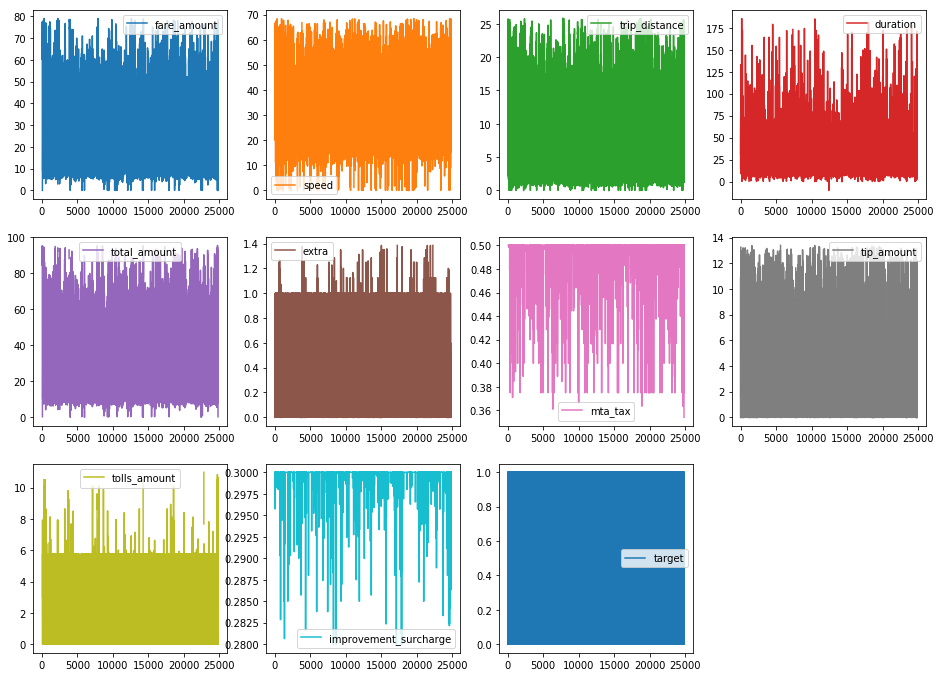

In [35]:
#line plot of all features and target data without extreme values
data_no_outlier.plot(kind='line',subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

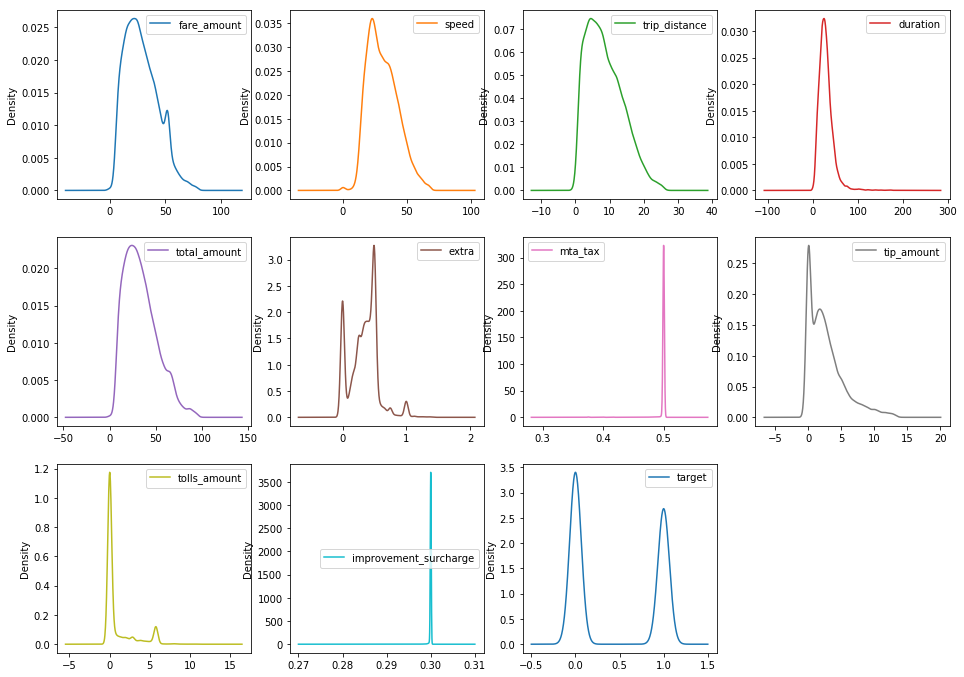

In [36]:
#density plot of all features and target data without extreme values
data_no_outlier.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

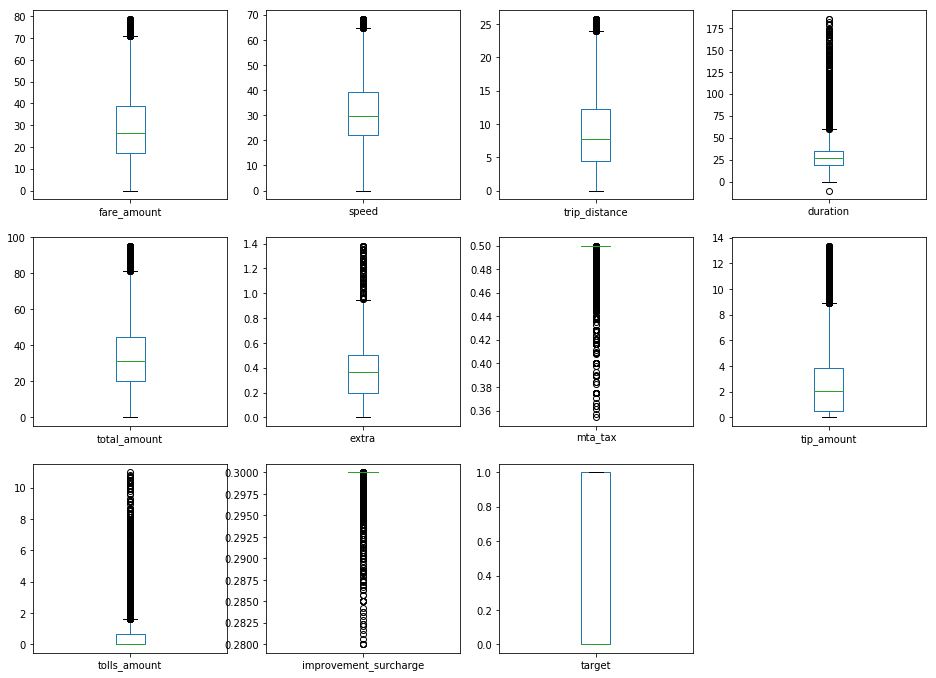

In [37]:
#box plot of all features and target data without extreme values
data_no_outlier.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False,figsize=(16,16))
plt.show()

From above plots we can see than some of the values are not in 75% quartile but as it can show some pattern in data, we will keep these value for modelling.

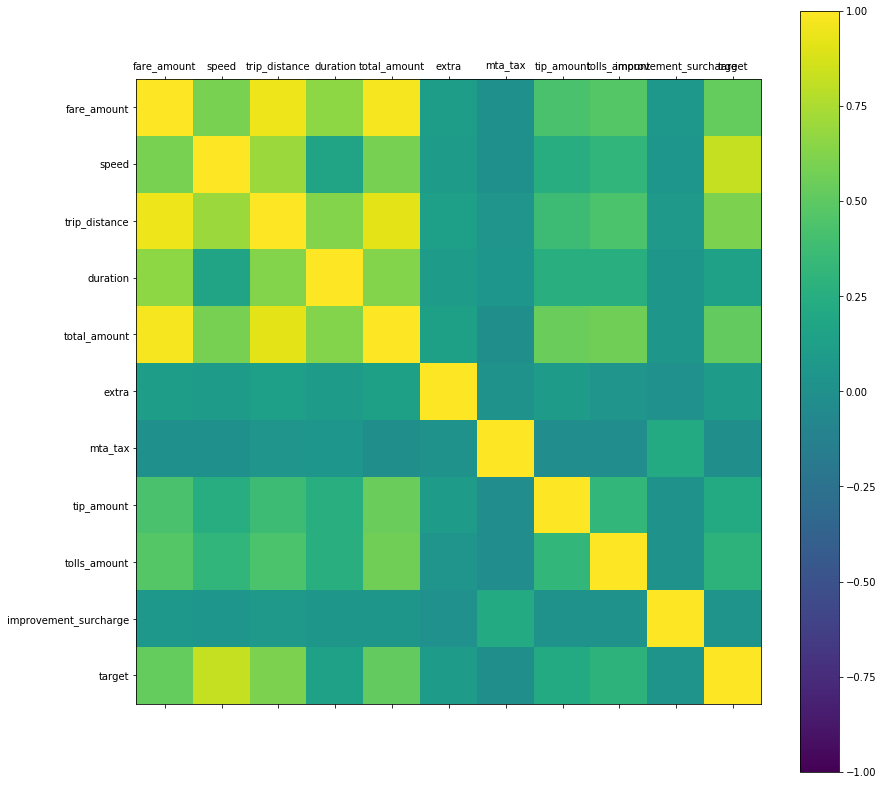

In [38]:
#plotting correlation between columns for data without extreme values
names = data_no_outlier.columns
correlations = data_no_outlier.corr()

# plot correlation matrix
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

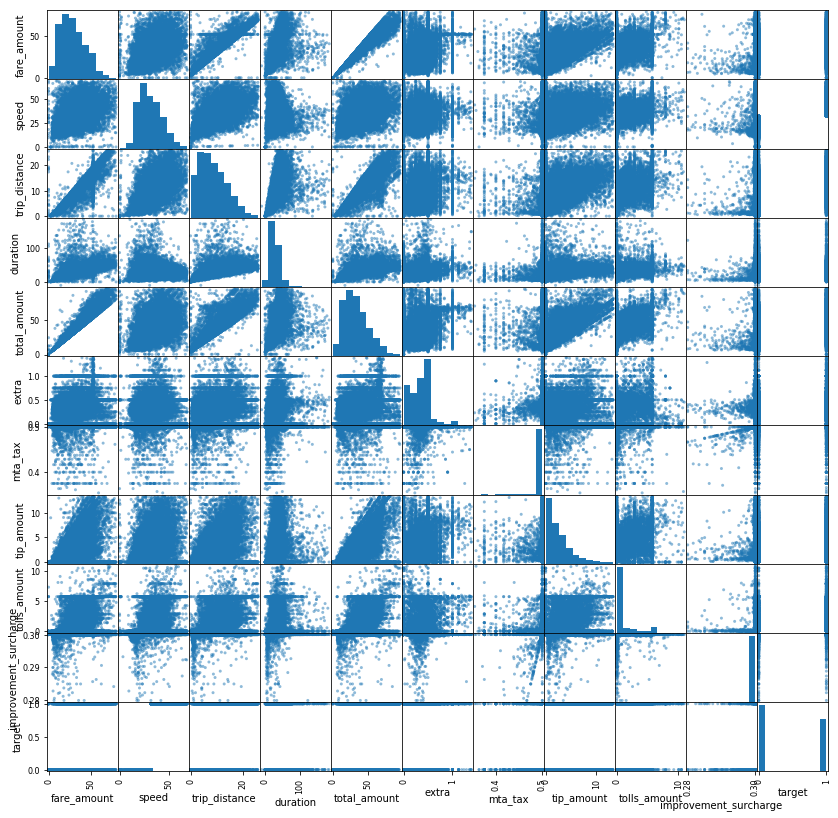

In [39]:
#scatter plot for all feature combination for data without extreme values
# Scatter plots can describe bivariate relationships
scatter_matrix(data_no_outlier, figsize=(14,14))
plt.show()

In [40]:
data_processed = data_no_outlier.fillna(method='ffill')

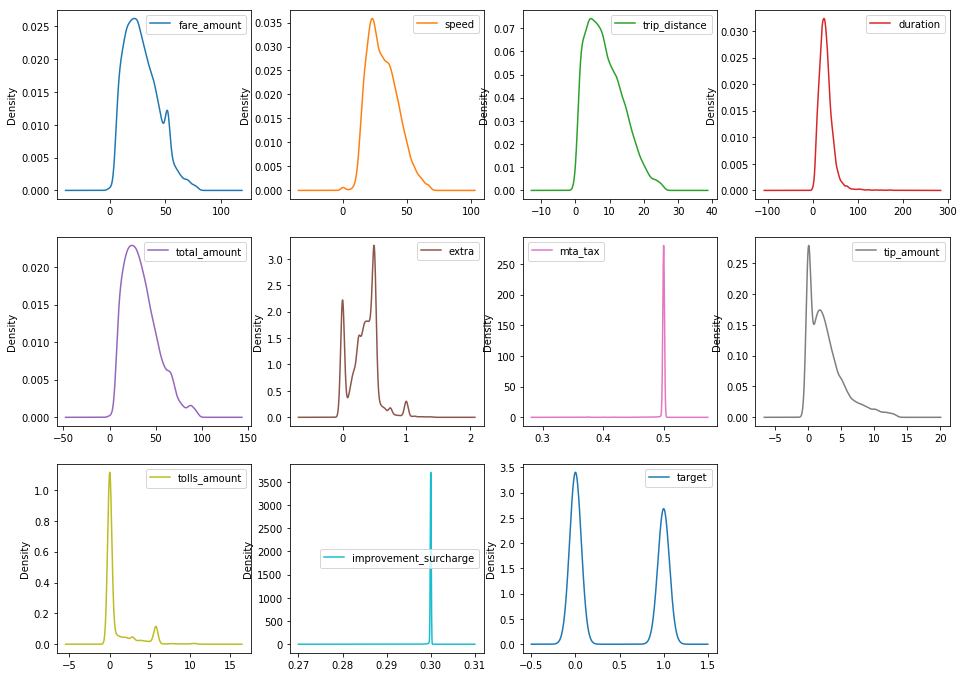

In [41]:
#density plot for all feature for data without extreme values and without missing values
data_processed.plot(kind='density', subplots=True, layout=(4,4), sharex=False,figsize=(16,16))
plt.show()

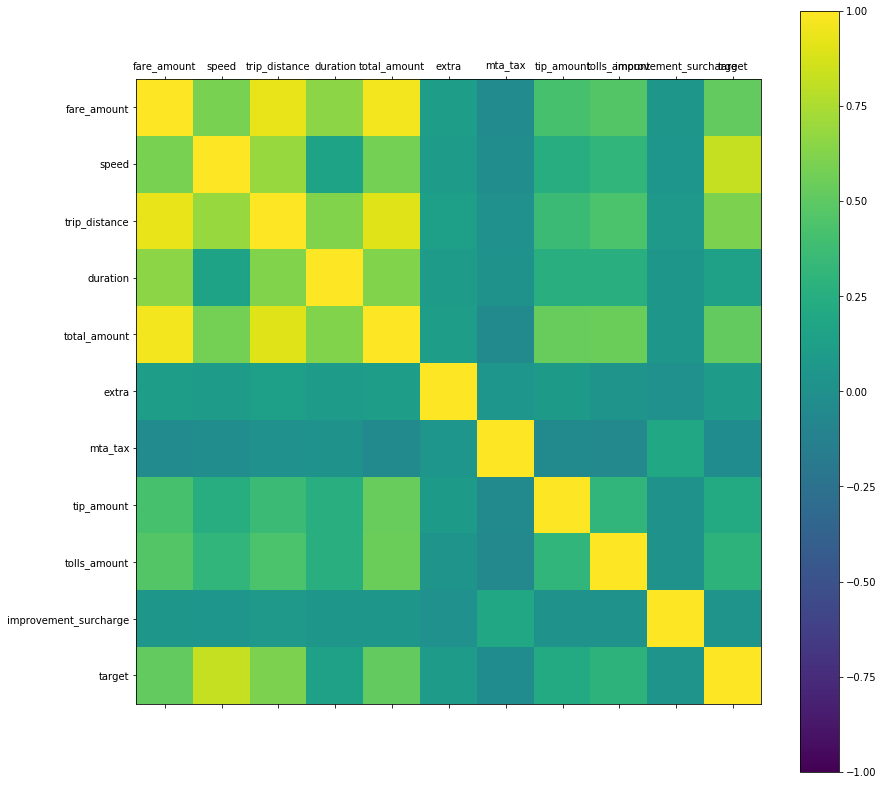

In [42]:
#plotting correlation between columns for data without extreme values and without missing values
names = data_processed.columns
correlations = data_processed.corr()

# plot correlation matrix
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Here, we can see that correlation of feature 'improvement_surcharge', 'mta_tax' and 'extra' is verry less with respects to all other features. So, we will remove these feature from modelling as it's not giving much information to model our target value.

Also, we can see that correlation of target value with 'speed' is more compared to any other feature. This, should relation should exist as target value is derived based on 'speed' with hypothesis testing.

In [43]:
#removing feature with low correlation value
data_final = data_processed.drop(['improvement_surcharge','mta_tax','extra'],axis=1)
data_final.head()

,fare_amount,speed,trip_distance,duration,total_amount,tip_amount,tolls_amount,target
0,62.900,49.172246,15.826000,31.496667,90.636,NaN,NaN,1
1,62.900,65.509465,15.826000,42.108333,90.636,0.000,NaN,1
2,62.900,65.509465,15.826000,48.016667,90.636,0.000,NaN,1
3,73.625,42.373314,18.682500,49.350000,92.140,3.965,NaN,1
4,73.625,42.373314,25.406667,34.272222,92.140,3.965,NaN,1


In [44]:
data_final.describe()

,fare_amount,speed,trip_distance,duration,total_amount,tip_amount,tolls_amount,target
count,24863.000000,24863.000000,24863.000000,24863.000000,24863.000000,24862.000000,24851.000000,24863.000000
mean,28.952541,31.284273,8.687133,28.700864,34.223164,2.701508,0.967364,0.440856
std,14.926027,11.656095,5.354532,16.169391,18.162142,2.734370,1.950094,0.496500
min,0.000000,0.000000,0.000000,-10.131824,0.000000,0.000000,0.000000,0.000000
25%,17.166667,22.159071,4.379449,18.583823,20.248980,0.500000,0.000000,0.000000
50%,26.750000,29.831729,7.836667,26.359375,31.143716,2.041751,0.000000,0.000000
75%,38.960123,39.187466,12.286429,35.338272,44.988750,3.898125,0.664615,1.000000
max,79.000000,68.470272,25.800000,185.594444,95.320000,13.390000,10.971429,1.000000


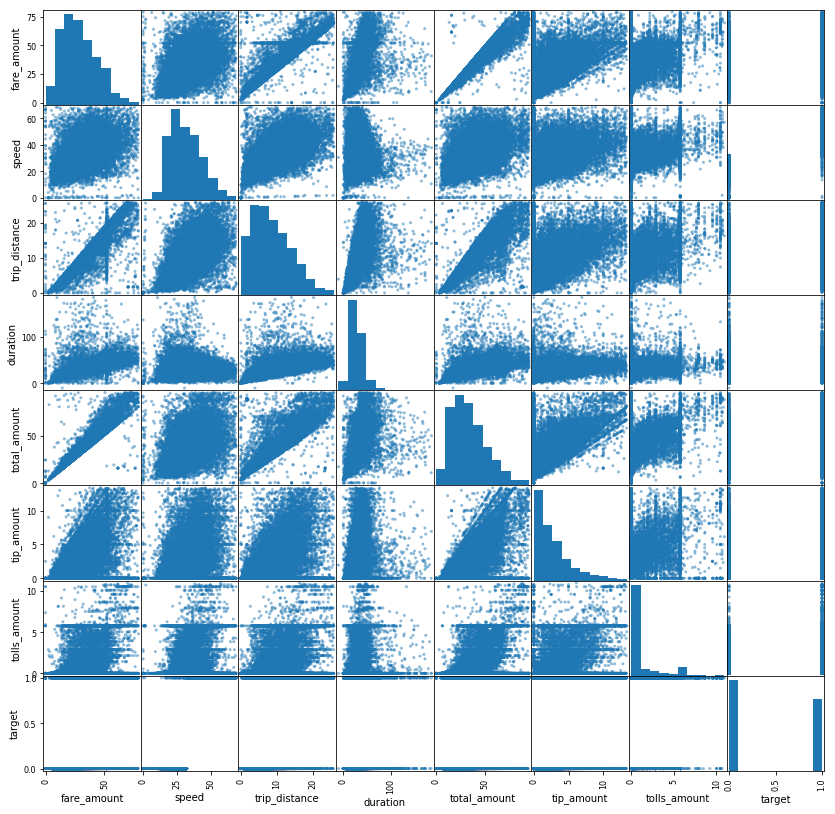

In [45]:
#scatter plot for all feature combination for final data
scatter_matrix(data_final,figsize=(14,14))
plt.show()

In [47]:
data_final.to_csv('data_final.csv',index=False)